# Linear Regression (Bayesian View) II

## Algebra
Previously our focus is on the posterior distribution of $\boldsymbol{w}$, but what we actually care is the prediction given an observation $\boldsymbol{x}$. Then the question is how to achieve this goal with posterior. The answer lies in the following equation:

$$
p(t\ |\ \boldsymbol{x}, \boldsymbol{t}, X,\alpha, \beta) = 
\int p(t\ |\ \boldsymbol{x}, \boldsymbol{w})p(\boldsymbol{w}\ |\ \boldsymbol{t}, X, \alpha, \beta)\mathrm{d}\boldsymbol{w}
$$

We could regard $\boldsymbol{x}$, $X$, $\alpha$, $\beta$ are all known parameters, leaving only $t$ and $\boldsymbol{w}$ worth taking care of.

The posterior $p(\boldsymbol{w}\ |\ \boldsymbol{t}, X, \alpha, \beta)$ can be regarded as a **marginal distribution** with respect to $\boldsymbol{w}$ and $p(t\ |\ \boldsymbol{x}, \boldsymbol{w})$ can be regardes as a **conditional distribution** with repect to $t$ conditioned on $\boldsymbol{w}$. Note that both of them are normal distribution, and it will be very convenient to get the **marginal distribution** with repect to $t$.

$$
p(t\ |\ \boldsymbol{x}, \boldsymbol{t}, X,\alpha, \beta) = 
\mathscr{N} (\boldsymbol{m}_N^T\boldsymbol{\phi}(\boldsymbol{x}), \beta^{-1}+\boldsymbol{\phi(x)^TS_N\phi(x)})
$$

where $\boldsymbol{m}_N$ and $\boldsymbol{S}_N$ are defined previously. 

## Simulation
Similar to the previous simulation, we still apply sequential fitting. The open circles are observations whose number increases from 1 to 100. The red dashed curve is the "real" curve we want to fit. The blue dashed curve is the fitting results obtained by the mean value of $t$, i.e. $\boldsymbol{m}_N^T\boldsymbol{\phi}(\boldsymbol{x})$. 

The blue shaded area sketch the boundaries of one standard deviation $\sigma$. **Note that $\sigma$ is a function of $\boldsymbol{x}$.** Whenever an observation $\boldsymbol{x}$ is observed, $\sigma(\boldsymbol{x})$ will become smaller around $\boldsymbol{x}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

BELTA = 10
POWER = 5

def sampling(X, size = 100, std = 1/10):
    begin, end = min(X), max(X)
    xx = np.random.uniform(begin, end, size)
    yy = np.sin(xx*np.pi) + np.random.normal(0, std, size)
    return xx, yy

def cal_phi(x_sample):
    phi = [x_sample**i for i in range(POWER)]
    phi = np.array(phi).T
    return phi

def update_para(x_sample, y_sample):
    phi = cal_phi(x_sample)
    cov = np.linalg.inv(np.eye(POWER) + phi.T.dot(phi))
    mean = cov.dot(phi.T).dot(y_sample)
    return mean, cov

def sampling_output_plot(X, Y, mean, cov, ax):
    phi = cal_phi(X)
    N = len(X)
    mean_N = phi.dot(mean)
    cov_N = [phi[i].dot(cov).dot(phi[i].T) + 1 / BELTA for i in range(N)]
    cov_N = np.array(cov_N)
    upper, lower = cov_N**0.5 + mean_N, -cov_N**0.5 + mean_N
    ax.plot(X, mean_N, linewidth = 3, linestyle = "dashed")
    ax.fill_between(X, lower, upper, color = "blue", alpha = 0.2)
    #ax.plot(X, lower)
    ax.plot(X, Y, linestyle = "dashed", c = "r", linewidth = 3)    
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-1, 1)
    
def sequential_fitting_plot(xx, yy, X, Y):
    fig, axes = plt.subplots(1, 3, figsize = (20,5))
    data_size = [1, 10, 100]
    for i in range(len(data_size)):
        s = data_size[i]
        mean, cov = update_para(xx[:s], yy[:s])
        sampling_output_plot(X, Y, mean, cov, axes[i])
        axes[i].scatter(xx[:s], yy[:s], marker = "o", s = 200, c = "", edgecolors = "r", alpha = 0.6, linewidth = 2)
        axes[i].set_title('Fitting based on {} Obveration'.format(s), fontsize = 15)
      

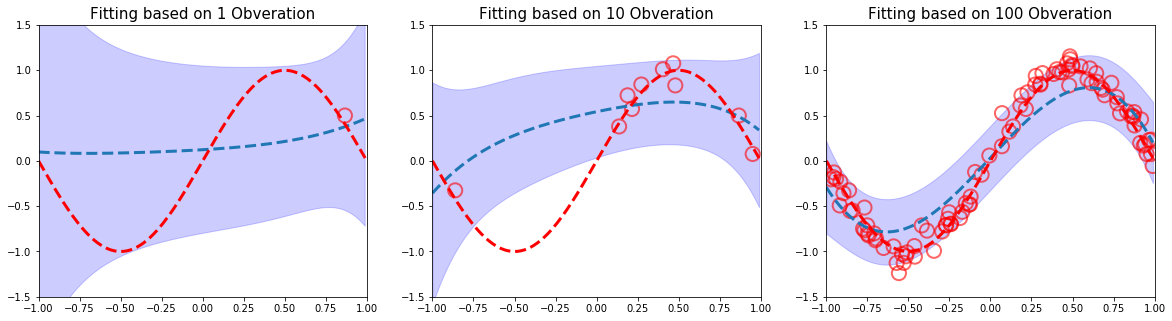

In [2]:
X = np.arange(-1,1,0.01)
Y = np.sin(X*np.pi)
xx, yy = sampling(X, size = 200, std = 1/BELTA)
sequential_fitting_plot(xx, yy, X, Y)